In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
import pingouin as pg
import import_ipynb
from scipy.stats import ks_2samp
from statsmodels.stats.weightstats import ztest as ztest

1.25.2
2.0.3
3.11.4 (main, Jul  5 2023, 13:45:01) [GCC 11.2.0]


/home/am275/.conda/envs/Jupyter-notebook/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Calculate mean hydrophobicity of  sub-sequence of length $2r_c+1(r_c=7)$ (Wimley-White Scale)

## Wimley, W. C.; White, S. H. Experimentally determined hydrophobicity scale for proteins at membrane interfaces. Nat. Struct. Biol. 1996, 3, 842–848.

In [8]:
# Define the Wimley-White hydrophobicity scale as a dictionary
hydrophobicity_scale = {
    'A': 0.17, 'R': 0.81, 'N': 0.42, 'D': 1.23, 'C': -0.24,
    'Q': 0.58, 'E': 2.02, 'G': 0.01, 'H': 0.96, 'I': -0.31,
    'L': -0.56, 'K': 0.99, 'M': -0.23, 'F': -1.13, 'P': 0.45,
    'S': 0.13, 'T': 0.14, 'W': -1.85, 'Y': -0.94, 'V': 0.07
}

def calculate_hydrophobicity_and_mean(protein_sequence):
    hydrophobicity = 0.0
    num_aa = 0
    for aa in protein_sequence:
        if aa in hydrophobicity_scale:
            hydrophobicity += hydrophobicity_scale[aa]
            num_aa += 1
    if num_aa != 0:
        mean_hydrophobicity = hydrophobicity / num_aa
    else:
        mean_hydrophobicity = None
    return hydrophobicity, mean_hydrophobicity

# Read sequences from file
with open("holin_mutated_seq_around_rc_7.txt", "r") as file:
    sequences = [line.strip() for line in file if not line.startswith(">")]

# Calculate and print average hydrophobicity for each sequence
print(f"Avg_Hydrophobicity")
for sequence in sequences:
    hydrophobicity, _ = calculate_hydrophobicity_and_mean(sequence)
    num_aa = len(sequence)
    average_hydrophobicity = hydrophobicity / num_aa
    #print(f"Average hydrophobicity for sequence '{sequence}': {average_hydrophobicity}")
    print(f"{average_hydrophobicity:.3f}")
    

Avg_Hydrophobicity
0.093
0.087
0.337
0.206
0.509
0.362
0.131
0.085
-0.163
-0.023
0.181
0.260
0.009
0.051
-0.054
0.209
0.194


# Correlation between MFPT and Mean Local Hydrophobicity

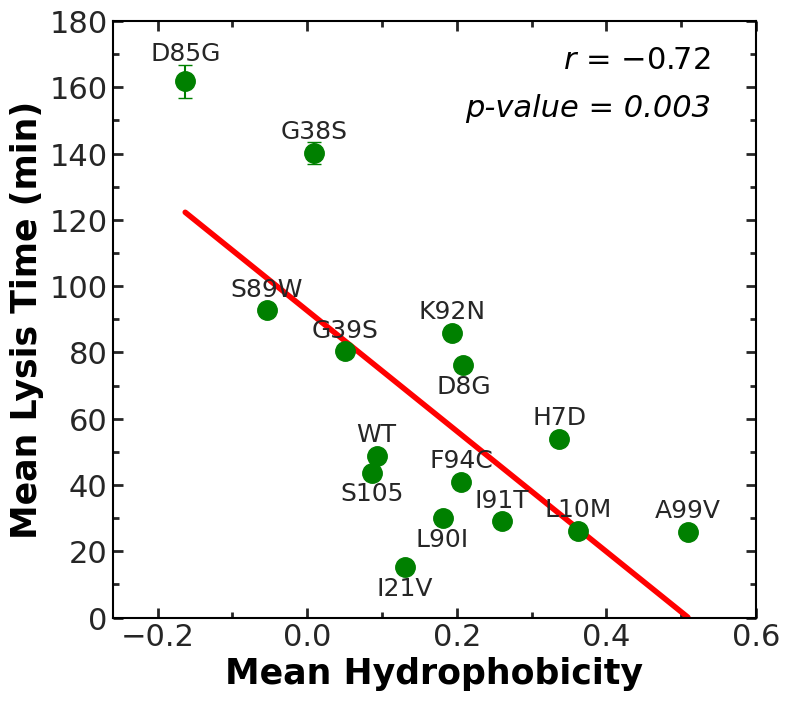

Slope: -181.82348225186738
Intercept: 92.64448313024147


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator  # Import AutoMinorLocator
from scipy.stats import pearsonr

# Read data from file
data_file = "MFPT_Average_Local_Hydrophobicity.txt"

mutants = []
mfpt = []
stderr_mfpt = []  # Adding a list for standard error of MFPT
mean_hydrophobicity = []

# Corrected mutant names
name_list_corrected = {
    "WT": "WT",
    "S105": "S105",
    "JJD246": "H7D",
    "JJD248": "F94C",
    "JJD251": "A99V",
    "JJD253": "L10M",
    "JJD388": "L25V/N37H",
    "JJD390": "A11G/Y31H",
    "JJD391": "A16G/K92Q",
    "JJD404": "I21V",
    "JJD405": "V45G",
    "JJD411": "D85G",
    "JJD413": "I87L",
    "JJD414": "L90I",
    "JJD415": "I91T",
    "JJD426": "G38S",
    "JJD428": "G39S",
    "JJD432": "S89W",
    "JJD434": "D8G",
    "JJD436": "K92N",
}

with open(data_file, 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.strip().split()
        mutant = parts[0]
        mfpt_val = float(parts[1])
        stderr_mfpt_val = float(parts[2])  # Extracting standard error of MFPT
        mean_hydrophobicity_val = float(parts[3])

        # Exclude "I87L" mutant and filter based on condition (MFPT < 55)
        if mutant not in ["JJD405", "JJD413"] and mfpt_val < 200:
        #if mfpt_val < 200:
            mutants.append(name_list_corrected[mutant])
            mfpt.append(mfpt_val)
            stderr_mfpt.append(stderr_mfpt_val)  # Appending standard error of MFPT
            mean_hydrophobicity.append(mean_hydrophobicity_val)

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(mean_hydrophobicity, mfpt)

# Plot
plt.figure(figsize=(8, 7))
plt.errorbar(mean_hydrophobicity, mfpt, yerr=stderr_mfpt, fmt='o', color='green', capsize=5, markersize=14)  # Include error bars

# Draw correlation line
plt.plot(np.unique(mean_hydrophobicity), np.poly1d(np.polyfit(mean_hydrophobicity, mfpt, 1))(np.unique(mean_hydrophobicity)), color='red', linewidth=4)

# Annotate each point with mutant name
#for i, mutant in enumerate(mutants):
#    plt.annotate(mutant, (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)
for i, mutant in enumerate(mutants):
    if mutant == "S105":
        plt.annotate("S105", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=18)
    elif mutant == "D85G":
        plt.annotate("D85G", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(0,15), ha='center', fontsize=18)
    elif mutant == "D8G":
        plt.annotate("D8G", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=18)
    elif mutant == "L90I":
        plt.annotate("L90I", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=18)
    elif mutant == "I21V":
        plt.annotate("I21V", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=18)
    else:
        plt.annotate(mutant, (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=18)

plt.axis([-0.26, 0.6, 0, 180])
plt.xlabel('Mean Hydrophobicity', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')


plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.rcParams["axes.edgecolor"]="black"
plt.rcParams["axes.linewidth"]=1.5

# Display p-value
#plt.text(-0.165, 1.1, "A", transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.text(0.93, 0.92, f'r = ${correlation_coefficient:.2f}$', transform=plt.gca().transAxes, fontsize=22, ha='right', color='black', style='italic')
plt.text(0.93, 0.84, f'p-value = {p_value:.3f}', transform=plt.gca().transAxes, fontsize=22, ha='right', color='black', style='italic')

plt.grid(False)
plt.tight_layout()
#plt.savefig('Fig4A_R7.pdf', bbox_inches='tight')
plt.show()

# Fit a line to the data
slope, intercept = np.polyfit(mean_hydrophobicity, mfpt, 1)

# Print the slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)
